<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# web location:
local_csv = './data/NHL_Data_GA.csv'

### 1. Load the NHL data

In [6]:
# A:
df = pd.read_csv(local_csv)
df.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


### 2. Perform any required data cleaning. Do some EDA.

In [11]:
# A:
df.describe(include='all')
df.isnull()


Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [14]:
# A:
df.Rank.value_counts()
y = df['Rank']

### 4. What is the baseline accuracy?

In [15]:
# A: how bad can the algorithm be
31/90

0.34444444444444444

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

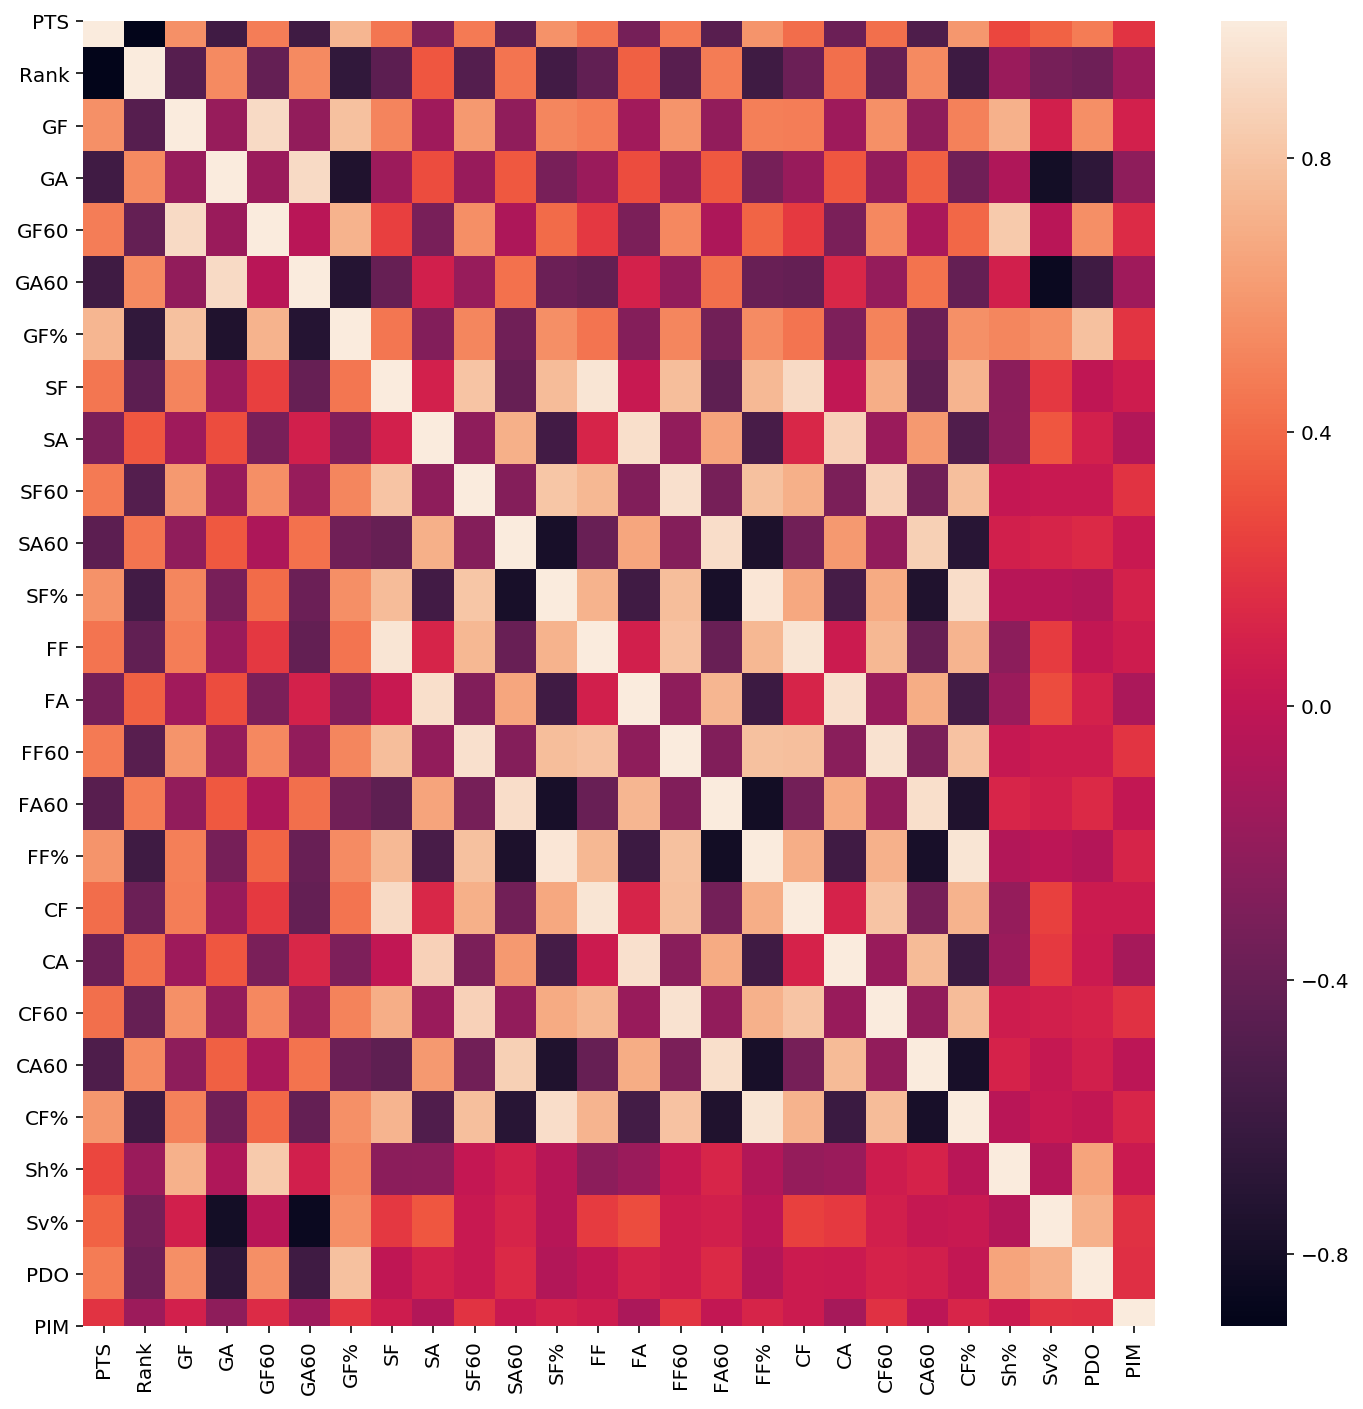

In [20]:
# A:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())
df.corr()['Rank'].sort_values()
X = df[['PTS', 'GF%', 'CF%', 'FF%']]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [25]:
# A:
from sklearn.neighbors import KNeighborsClassifier

#instantiate
kn = KNeighborsClassifier(n_neighbors = 5)

#fit
kn.fit(X,y)

#predict
kn_preds = kn.predict(X)

#score
kn.score(X,y)

0.9555555555555556

In [26]:
kn_preds, np.array(y), len(kn_preds), len(y)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3]),
 90,
 90)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [9]:
# A:
# yes, but not legitimate because we predicted on the same element we trained on

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [27]:
# A:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76, 4), (14, 4), (76,), (14,))

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [28]:
# A:
#instantiate
kn = KNeighborsClassifier(X_train.shape[0])

#fit
kn.fit(X_train,y_train)

#predict
kn_preds = kn.predict(X_test)

#score
kn.score(X_test,y_test)

0.2857142857142857

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

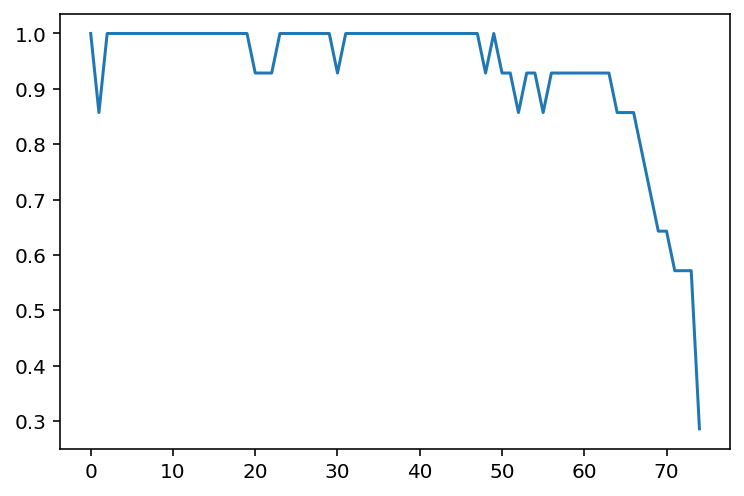

In [33]:
# A:
scores = dict()
scores_list = []

for k in range(1, X_train.shape[0]):
    kn = KNeighborsClassifier(k)
    kn.fit(X_train,y_train)
    score = kn.score(X_test,y_test)
    scores[k] = score
    scores_list.append(score)
    
plt.plot(scores_list);

In [36]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_transform = stdsc.fit_transform(X_train)
X_test_transform = stdsc.transform(X_test)

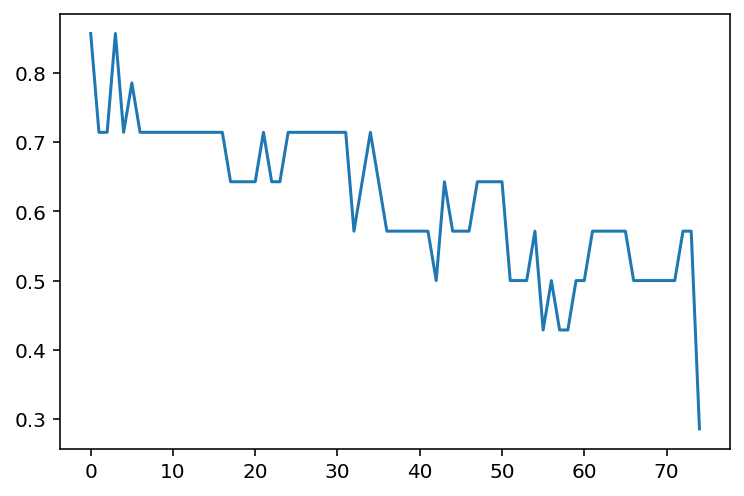

In [37]:
# A:
scores = dict()
scores_list = []

for k in range(1, X_train.shape[0]):
    kn = KNeighborsClassifier(k)
    kn.fit(X_train_transform,y_train)
    score = kn.score(X_test_transform,y_test)
    scores[k] = score
    scores_list.append(score)
    
plt.plot(scores_list);

In [39]:
# store model for model persistence
from joblib import dump, load

kn = KNeighborsClassifier(10)
clf = kn.fit(X,y)


dump(clf, './kn_model.p') 


['./kn_model.p']

In [40]:
clf = load('./kn_model.p')


In [41]:
print(clf.predict(X_test))
kn.predict(X_test)

[2 1 2 3 1 1 2 3 1 2 3 2 2 3]


array([2, 1, 2, 3, 1, 1, 2, 3, 1, 2, 3, 2, 2, 3])

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [13]:
# A:

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [14]:
# A: